*Autores: Alex H. Pfoccori Quispe, Milton A. Mozo Davila*

# Arboles de decision

## Ajustes de arboles de clasificacion
La biblioteca de ***tree*** es usado para construir arboles de clasificacion y regresion.

In [1]:
library(tree)

Primero usamos arboles de clasificacion para analizar el conjunto de datos de ***Carseats***. En estos datos, ***Sales*** es una variable continua po rlo que comenzamos remodificandola como una variable binaria. Usamos la funcion ***ifelse()*** para crear una variable, llamada ***High***, el cual toma un valor de ***Yes*** si la variable ***Sales*** excede a 8, y toma el valor de ***No*** en caso contrario.

In [2]:
library(ISLR)
attach(Carseats)
High=ifelse(Sales <= 8, "No", "Yes")

Finalmente, usamos la funcion ***data.frame()*** para unir ***High*** con el resto de los datos de ***Carseats***.

In [ ]:
Carseats=data.frame(Carseats, High)

Ahora usamos la funcion ***tree()*** para ajustar un arbol de clasificacion con el fin de predecir ***High*** usando todas las variables excepto ***Sales***. La sintaxis de la funcion ***tree()*** es bastante similar a la funcion ***lm()***.

In [3]:
tree.carseats=tree(Sales~., Carseats)

La funcion ***summary()*** enumera las variables que se utilizan como nodos internos en el arbol, el numero de nosos terminales y la tasa de error (de entrenamiento).

In [4]:
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "Population" 
[6] "Advertising"
Number of terminal nodes:  17 
Residual mean deviance:  2.878 = 1102 / 383 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.98700 -1.23000 -0.06125  0.00000  1.22500  4.75400 

Vemos que la tasa de error de entrenamiento es el del 9%. Para los arboles de clasificacion, la desviacion informada en el resultado des summary() viene dado por:
Donde nmk es le numero de observaciones en el m-simo nodo terminal que pertenee a la k-esima clase. Una pequena desviacion indica un arbol que se ajusta bie a los datos (de entrenamiento).
La desviacon media residual informada es simplemente la desviacoin dividida por n-|T0|. Que en este caso es 400-27 = 373.

Una de las propiedades mas atractivas de los arboles es que se pueden mostrar graficamente. Usamos la funcion ***plot()*** para mostrar la estructura de arbol y la funcion ***text()*** para mostrar las etiquetas de los nodos. El argumento ***pretty=0*** indica a R que incluya los nombres de las categorias para cualquier predictor cualitativo, en lugar de simplemente mostrar una letra para cada categoria.

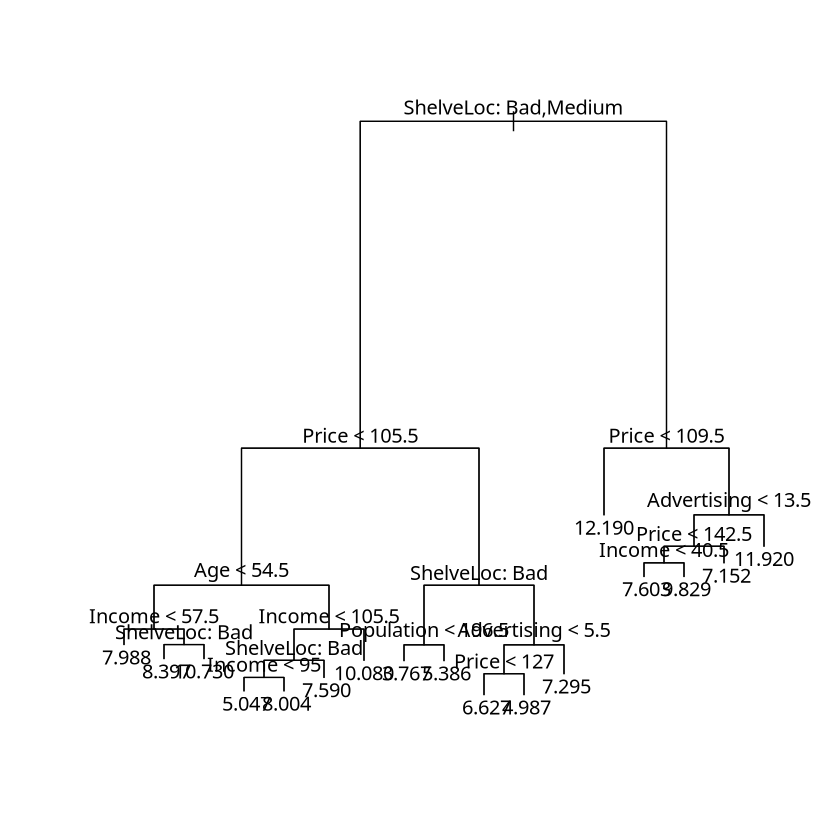

In [5]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

El indicador mas importante de ventas parece ser la ubicacion de las estanterias, ya que la primera sucursal diferencia las ubicaciones buenas de las ubicaciones malas y medias.

Si solo escribimos el nombre del objeto del arbol, R imprime la salida correspondiente a cada rama del arbol. R muestra el criterio de division, el numero de observaciones en esa rama, la desviacion, la prediccion general para la rama (Si o No) y la fraccion de observaciones en esa rama que toman valores Si o No. Las ramas que conducen a nodos terminales se indican mediante asteriscos.

In [6]:
tree.carseats

node), split, n, deviance, yval
      * denotes terminal node

 1) root 400 3182.0000  7.496  
   2) ShelveLoc: Bad,Medium 315 1860.0000  6.763  
     4) Price < 105.5 108  568.6000  8.189  
       8) Age < 54.5 43  158.7000  9.413  
        16) Income < 57.5 13   19.2400  7.988 *
        17) Income > 57.5 30  101.6000 10.030  
          34) ShelveLoc: Bad 9   22.7600  8.397 *
          35) ShelveLoc: Medium 21   44.5300 10.730 *
       9) Age > 54.5 65  303.1000  7.380  
        18) Income < 105.5 56  203.0000  6.946  
          36) ShelveLoc: Bad 20   76.9600  5.786  
            72) Income < 95 15   43.8100  5.047 *
            73) Income > 95 5    0.3687  8.004 *
          37) ShelveLoc: Medium 36   84.2400  7.590 *
        19) Income > 105.5 9   23.8200 10.080 *
     5) Price > 105.5 207  956.6000  6.019  
      10) ShelveLoc: Bad 61  240.8000  4.722  
        20) Population < 196.5 25   88.2300  3.767 *
        21) Population > 196.5 36  113.9000  5.386 *
      11) ShelveLoc: Med

Para evaluar correctamente el rendimiento de un arbol de clasificacion sobre estos datos, debemos estimar el error de prueba en lugar de simplemente calcular el error de entrenamiento. Dividimos las observaciones en un conjunto de entrenamiento y evaluamos su desempeno en los datos de prueba. La funcion ***predict()*** se puede utilizar para este proposito. En el caso de un arbol de clasificacion, el argumento tipo = "clase" indica a R que devuelva la prediccion de la clase real. Este enfoque conduce a precciones correctas pra alrededor del 71.5% de llas ubicaciones en el conjunto de datos de pruebas.

In [9]:
set.seed(2)
train=sample(1: nrow(Carseats), 200)
Carseats.test = Carseats[-train,]
tree.carseats = tree(Sales~., Carseats, subset=train)
tree.pred = predict(tree.carseats, Carseats.test)
table(tree.pred)

tree.pred
         2.31375            2.784          4.26875 5.18272727272727 
               4                7               11               23 
5.95739130434783            7.092         7.333125             7.51 
              19                5               29               11 
8.29666666666667            8.643          8.80875 9.45882352941176 
              18               14               30                9 
10.9166666666667          12.7025 
              10               10 

A continuacion, consideramos si la poda del arbol podria conducir a una mejora de resultados. La funcion cv.tree() realiza una validacion cruzada para que cv.tree() determine el nivle optimo de complejidad del arbol; la poda de costo complejo se utiliza para seleccionar una secuencia de arboles para su consideracion. Usamos el argumento ***FUN=prune.misclass*** para indicar que queremos que la tasa de error de clasificacion quie el proceso de validacion cruzada y poda, en lugar del valor predeterminado para la funcion cv.tree(), que la desviacion. La funcion ***cv.tree()*** reporta el numero de nodos terminales de cada arbol considerando asi como la tasa de error correspondiente y el valor dle parametro de costo complejidad usando (k, que corresponde a un lafa)

In [11]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats)
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [12]:
cv.carseats

$size
 [1] 14 13 12 11 10  9  8  7  6  4  3  2  1

$dev
 [1] 1022.2839  998.7169  978.9037  976.7845  943.7332  979.2549  971.4589
 [8]  988.8085 1055.7410 1087.1581 1078.3324 1196.6729 1509.8323

$k
 [1]      -Inf  16.92509  19.38585  23.44178  29.89370  36.28493  50.16562
 [8]  54.84825  65.75957  80.79945  90.11022 179.77305 277.78708

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

Tenga en cuenta que a pesar del nombre, dev corresponde a la tasa de error de validacion cruzada en este caso. El arbol con 9 nodos terminales da como resultado la tasa de error de validacion cruzada mas baja, con 50 errores de validacion cruzada. Trazamos la tasa de error en funcion tanto del tamano como de k.

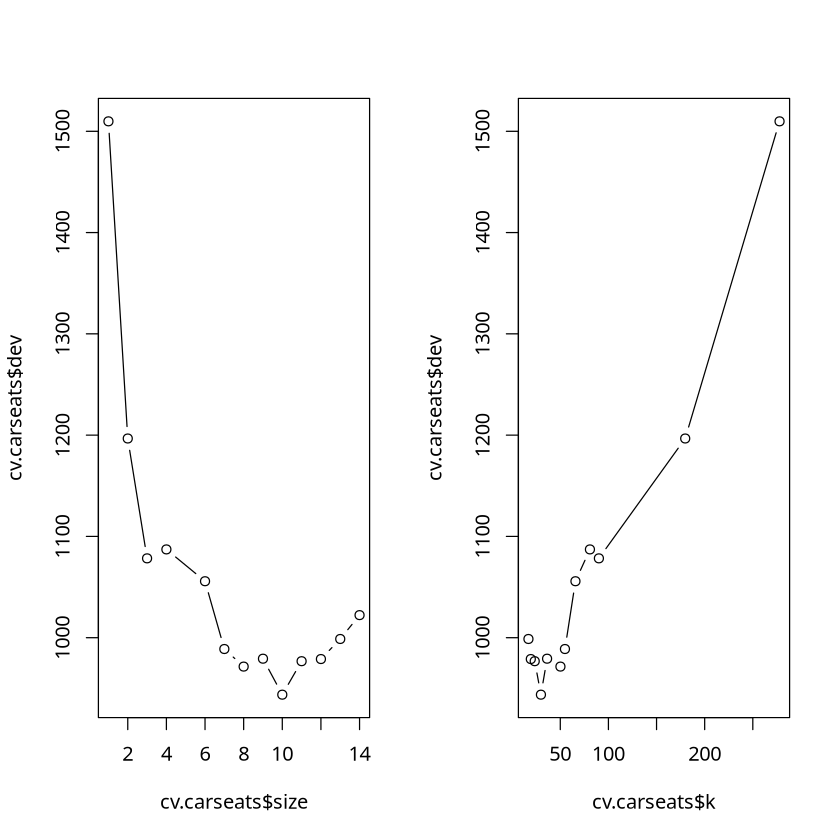

In [13]:
par(mfrow=c(1,2))
plot(cv.carseats$size, cv.carseats$dev, type="b")
plot(cv.carseats$k, cv.carseats$dev, type="b")

Ahora aplicamos la funcion ***prune.misclass()*** para podar el arbol a podar. Obtenr de nueve nodos.

In [ ]:
prune.carseats = prune.misclass(tree.carseats, best=9)

In [ ]:
plot(prune.carseats)
text(prune.carseats, pretty = 0)

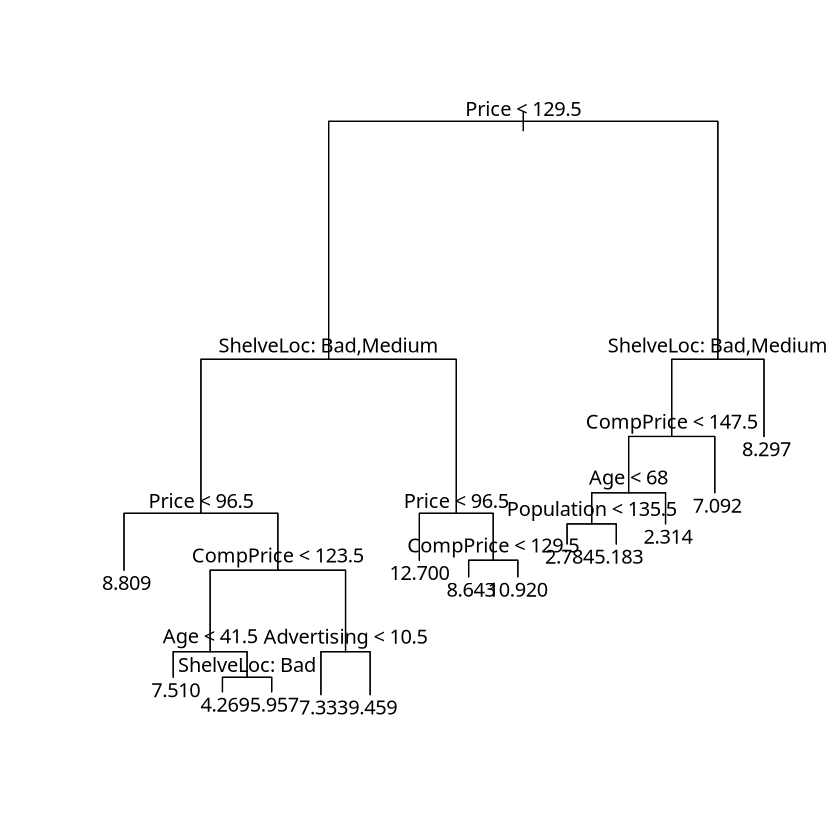

In [16]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

Que bien se desempena este arbol podado en el conjunto de datos de prueba. Una vez mas, aplicamos la funcion ***predict()***.

In [17]:
tree.pred = predict(tree.carseats, Carseats.test)
table(tree.pred)

tree.pred
         2.31375            2.784          4.26875 5.18272727272727 
               4                7               11               23 
5.95739130434783            7.092         7.333125             7.51 
              19                5               29               11 
8.29666666666667            8.643          8.80875 9.45882352941176 
              18               14               30                9 
10.9166666666667          12.7025 
              10               10 

Ahora el 77% de las observaciones de prueba estan clasificados correctamente, por lo que el proceso de poda no solo ha producido un arbol mas interpretable, sino que tambien ha mejorado la prediccion de la clasificacion. Si aumentamos el valor de mejor, obtenemos un arbol podado mas grande con mejor prediccion.

## Ajustes de arboles de regresion

Aqui ajustamos un arbol de regresion al conjutno de datos de Boston. Primero, creamos un conjunto de entrenamiento y ajustamos el arbol a los datos de entrenamiento.

In [21]:
library(MASS)
set.seed(1)
train=sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~., Boston, subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

Observe que la salida de summary() indica que solo tres de las variables se han usado en la construccion del arbol. En el contexto de un arbol de regresion, la desviacion es simplemente la suma de los erroes al cuadrado del arbol. Ahora trazamos el arbol.

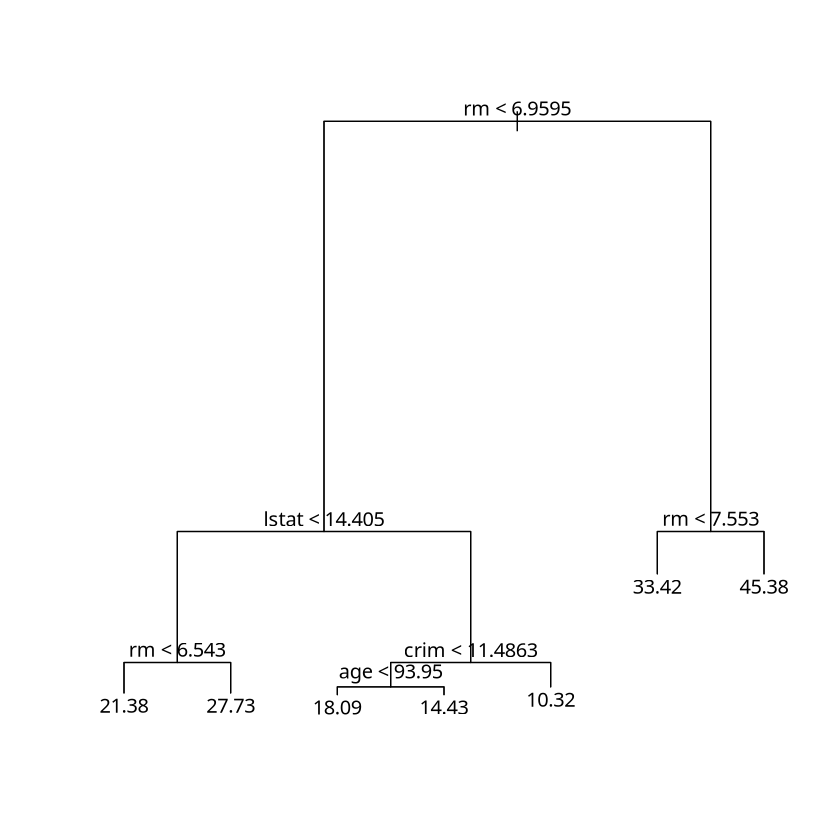

In [22]:
plot(tree.boston)
text(tree.boston, pretty=0)

La variable lstat mide el porcentaje de individuos con menor estatus socieconomicos. El arbol indica que los valores mas bajos de lstat corresponden a casas mas caras. El arbol predice un precio medio de la vivienda de 46000 dolares para casa mas grandes en los suburbios en que los residentes tienen un alto estatus socioeconomico.
Ahora usamos la funcion ***cv.tree()*** para ver si podar el arbol mejorara el rendimiento.

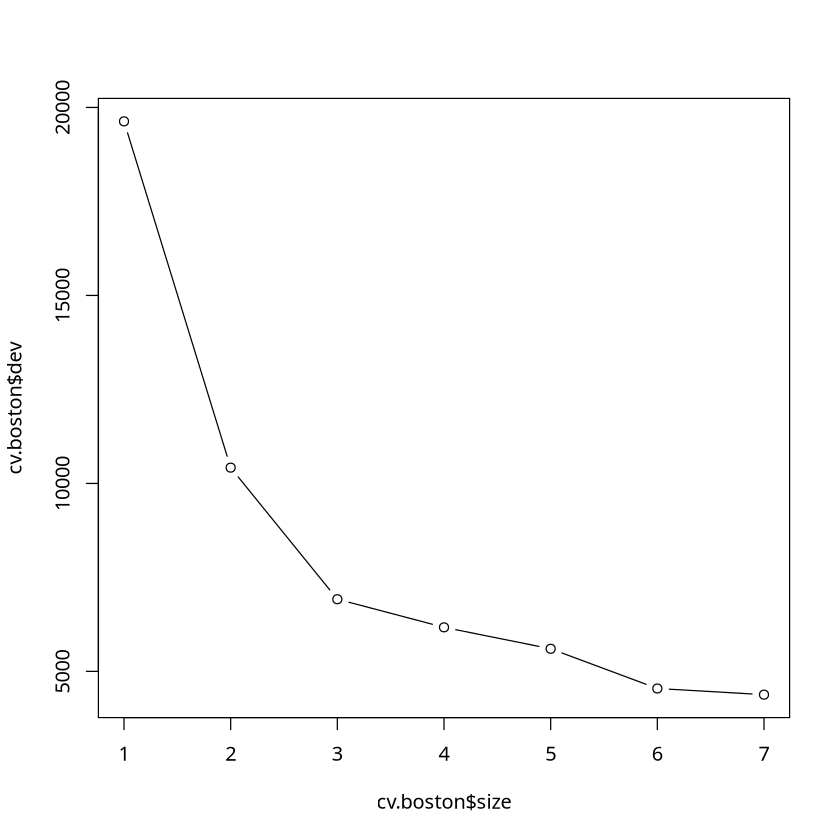

In [23]:
cv.boston = cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type="b")

En este caso, el arbl mas complejo se selecciona mediante validacion cruzada. Sin embargo, si deseamos podar el arbol, podemos hacerlo de la siguiente forma, usando la funcion prune.tree().

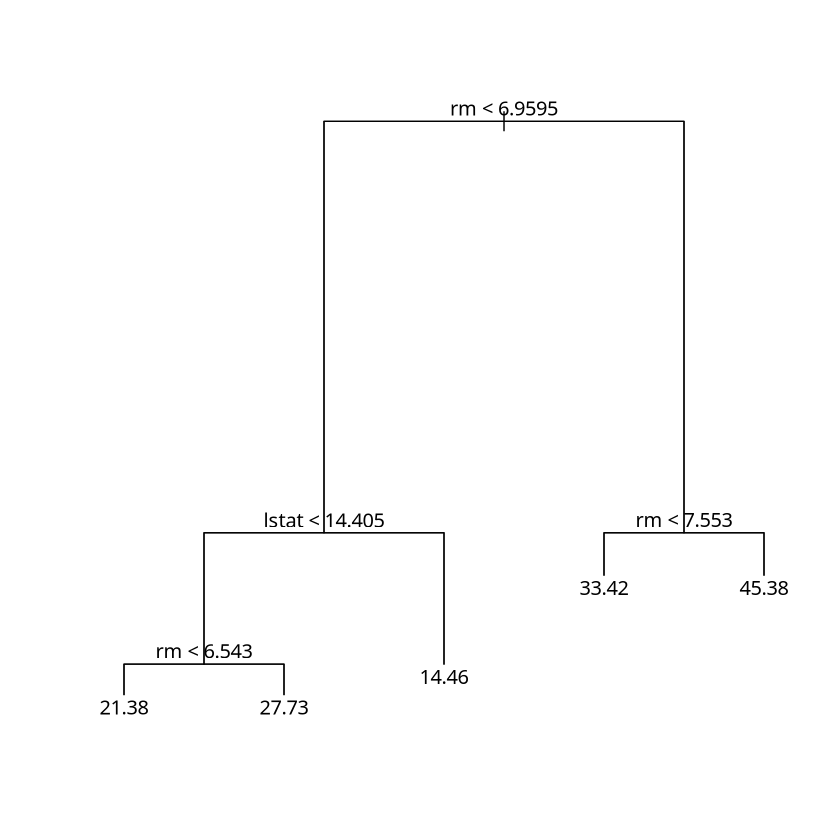

In [24]:
prune.boston = prune.tree(tree.boston, best=5)
plot(prune.boston)
text(prune.boston, pretty=0)

De acuerdo con los resultados de la validacoin cruzada, usamos el arbol sin podar para hacer predicciones en el conjunto de prueba.

[1] 35.28688

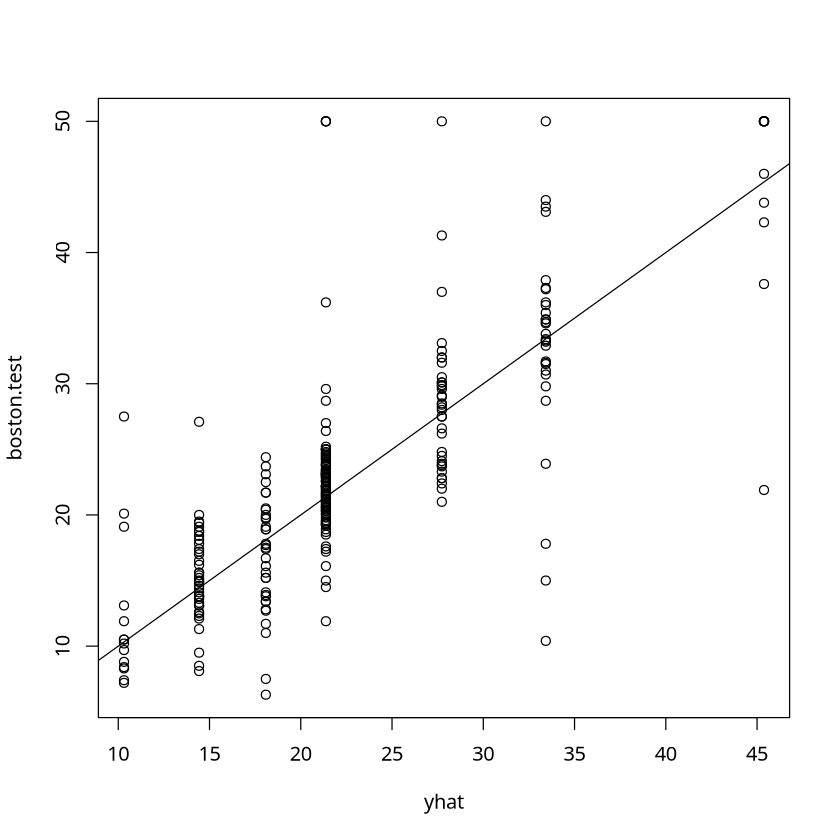

In [26]:
yhat=predict(tree.boston, newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat, boston.test)
abline(0,1)
mean((yhat-boston.test)^2)

En otras palabras, el MSE del conjutno de pruebas asociado con el arbol de regresion es de 25.05. Por lo tanto, la raiz caudrada de MSE es de alrederos 5.03, lo que indica que este modelo conduce a predicciones de prueba que se encuentran dentro de alrededor de 5005 dolares de valor medio real de vivienda para el suburbio.

## Sacos y bosques aleatorios

Aqui aplicamos empaquetamiento y bosques aleatorios a los datos de Boston, usando el paquete randomForest en R. Los resultados exactos obtenidos en esta seccion pueden depender de la version de R y la version del paquete randomForest instalada en la computadora, Recordemos que el embolsado es simplemente un caso especial de un bosque al azar con m = p. Por lo tanto, la funcion randomForest() se puede utilizar para realizar tanto bosques aleatorios como empaquetamiento. Realizamos embolsado como sigue.

In [30]:
library(randomForest)

In [34]:
set.seed(1)
bag.boston =randomForest(medv~.,data=Boston ,subset =train ,mtry=13, importance =TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

El argumento mtry = 13 indica que se deben considerar los 13 predictores para cada division del arbol; en otras palabras, se debe realizar el empaquetamiento. ¿Que tan bien se desempeña este modelo embolsado en el conjunto de prueba?

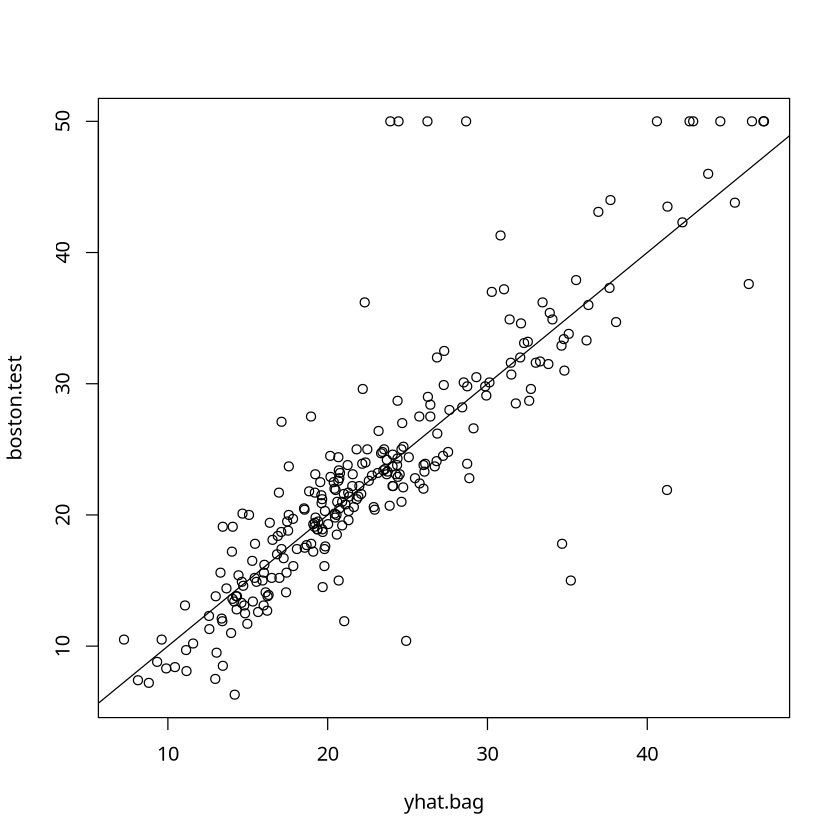

In [35]:
yhat.bag = predict (bag.boston ,newdata =Boston [-train ,])
plot(yhat.bag , boston.test)
abline (0,1)

In [36]:
mean(( yhat.bag -boston.test)^2)

[1] 23.59273

El MSE del conjunto de pruebas asociado con el arbol de regresion empaquetado es 13.16, casi la mitad que se obtiene utilizando un arbol unico optimizado. Podriamos cambiar el numero de arboles cultivados por randomForest() usando el argumento ntree.

In [37]:
bag.boston =randomForest(medv~.,data=Boston ,subset =train ,mtry=13, ntree =25)
yhat.bag = predict (bag.boston ,newdata =Boston [-train ,])
mean(( yhat.bag -boston.test)^2)

[1] 23.66716

El crecimiento de un bosque aleatorio procede exactamente de la misma manera, excepto que usamos un valor mas pequeño del argumento mtry. De forma predeterminada, randomForest() u√s p / 3 variables cuando se crea un bosque aleatorio de arboles de regresion, y p variables cuando se crea un bosque aleatorio de arboles de clasificacion. Aqui usamos mtry = 6.

In [38]:
set.seed (1)
rf.boston =randomForest(medv~.,data=Boston ,subset =train ,mtry=6, importance =TRUE)
yhat.rf = predict (rf.boston ,newdata =Boston [-train ,])
mean(( yhat.rf -boston.test)^2)

[1] 19.62021

El conjunto de prueba MSE es 11.31; esto indica que los bosques aleatorios produjeron una mejora sobre el empaquetamiento en este caso. Usando la funcion importance(), podemos ver la importancia de cada variable.

In [39]:
importance(rf.boston )

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


Se pueden producir graficos de estas medidas de importancia utilizando la funcion varImpPlot().

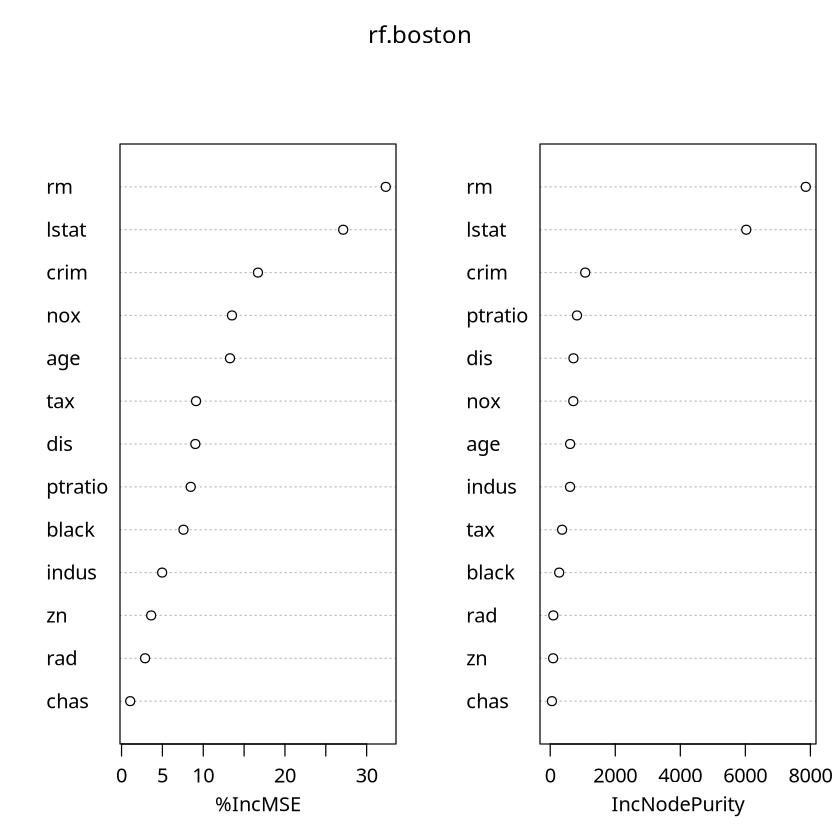

In [40]:
varImpPlot (rf.boston )

Los resultados indican que en todos los arboles considerados en el bosque aleatorio, el nivel de riqueza de la comunidad (lstat) y el tamaño de la casa (rm) son, con mucho, las dos variables mas importantes.

## Bosting

Aquí usamos el paquete gbm, y dentro de el la funcion gbm(), para ajustar los arboles de regresion aumentados al conjunto de datos de Boston. Ejecutamos gbm() con la opcion distribution = “gaussian” ya que este es un problema de regresion; Si se tratara de un problema de clasificacion binaria, utilizaríamos distribution = “bernoulli”.

In [41]:
library (gbm)

Loaded gbm 2.1.8



In [42]:
set.seed (1)
boost.boston =gbm(medv~.,data=Boston [train ,], distribution= "gaussian",n.trees =5000 , interaction.depth =4)

La funcion summary() produce un grafico de influencia relativa y tambien genera las estadisticas de influencia relativa.

,var,rel.inf
,<chr>,<dbl>
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654


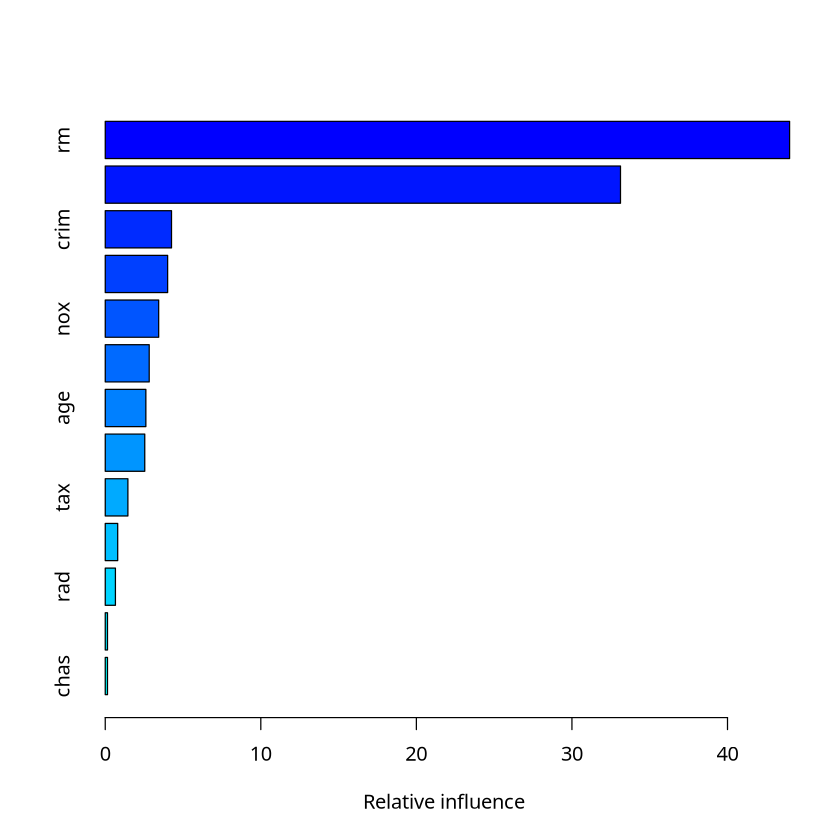

In [43]:
summary (boost.boston )

Vemos que lstat y rm son las variables más importantes. Podemos Tambien se producir parcelas de dependencia parcial para estas dos variables. En este caso, como cabria esperar, la mediana. Los precios de las casas aumentan con rm y disminuyen con lstat.

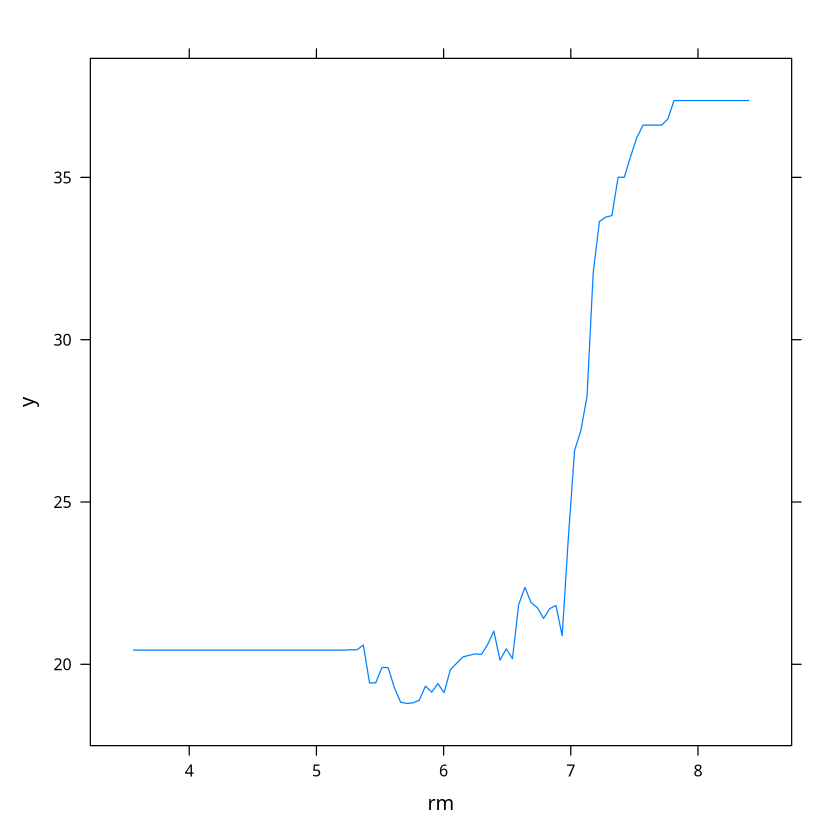

In [44]:
par(mfrow =c(1,2))
plot(boost.boston ,i="rm")

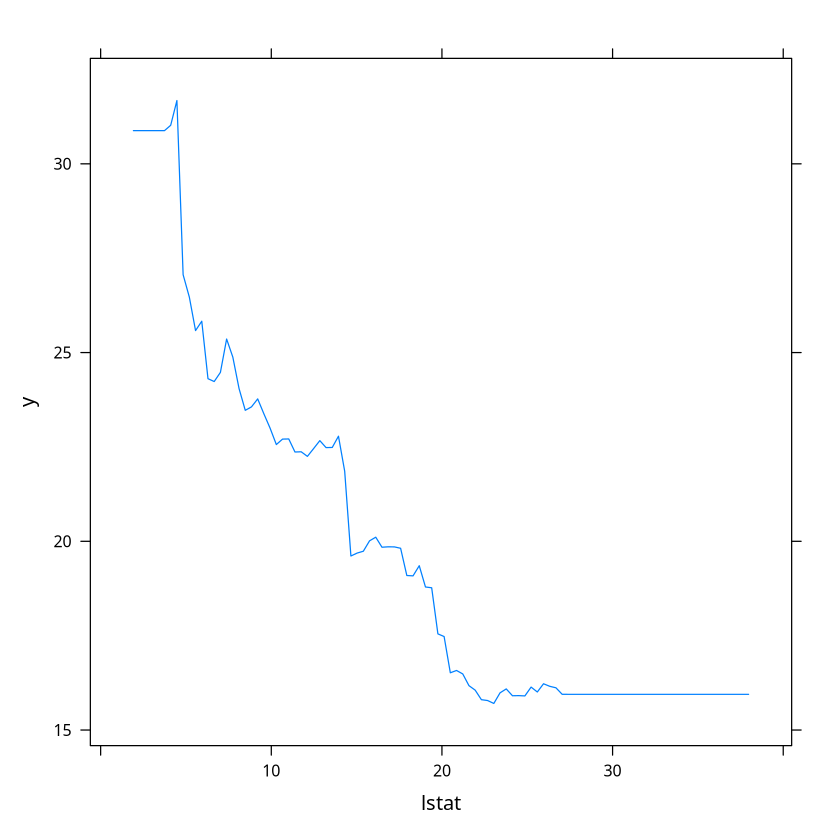

In [45]:
plot(boost.boston ,i="lstat")

Ahora usamos el modelo reforzado para predecir medv en el conjunto de prueba:

In [46]:
yhat.boost=predict (boost.boston ,newdata =Boston [-train ,],n.trees =5000)
mean(( yhat.boost -boston.test)^2)

[1] 18.84709

La prueba MSE obtenida es 11.8; Similar al MSE de prueba para bosques aleatorios y superior al de ensacado. Si queremos, podemos realizar un aumento con un valor diferente del parametro de contraccion λ en (8.10). El valor predeterminado es 0.001, pero esto se modifica facilmente. Aquí tomamos λ = 0.2.

In [47]:
boost.boston =gbm(medv~.,data=Boston [train ,], distribution="gaussian",n.trees =5000 , interaction.depth =4, shrinkage =0.2,verbose =F)
yhat.boost=predict (boost.boston ,newdata =Boston [-train ,],n.trees =5000)
mean(( yhat.boost -boston.test)^2)

[1] 18.33455